In [8]:
from funcs import *
import matplotlib.pyplot as plt

In [14]:
number_of_runs = 100
number_of_prisoners = 100

result = many_runs(number_of_runs,number_of_prisoners)[0]
counts = many_runs(number_of_runs,number_of_prisoners)[1]
hits = result.count(1)
hits/len(result)

0.35

In [16]:
totals = []

for i in counts:
    totals += i

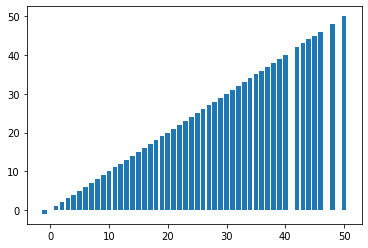

In [20]:
plt.bar(totals,totals);